# Chapter 1


### Imports

In [1]:
import cv2
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
import mpl_toolkits.axes_grid1 as axes_grid1
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: 84em; }</style>"))

paths = ["Lenna.png", "Buildings.jpg", "Cart.jpg"]

def get_grid(rows, cols):
    grid = axes_grid1.AxesGrid(
        fig, 111, nrows_ncols=(rows, cols), axes_pad = 0.5, cbar_location = "right",
        cbar_mode="each", cbar_size="15%", cbar_pad="5%")
    return grid

### Original Images

Lenna.png
Height: 512px
Width: 512px
Number of channels: 3


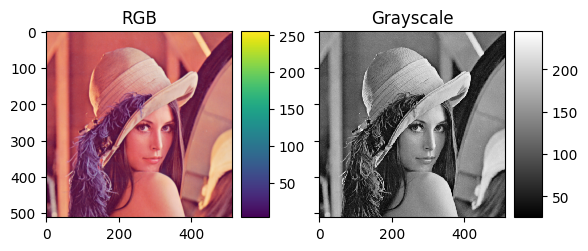

Buildings.jpg
Height: 512px
Width: 512px
Number of channels: 3


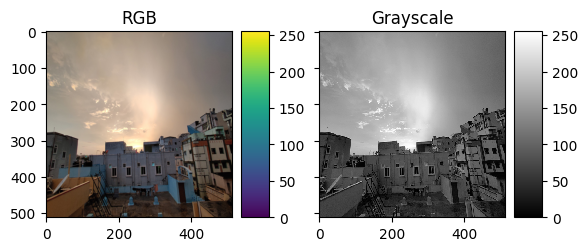

Cart.jpg
Height: 512px
Width: 512px
Number of channels: 3


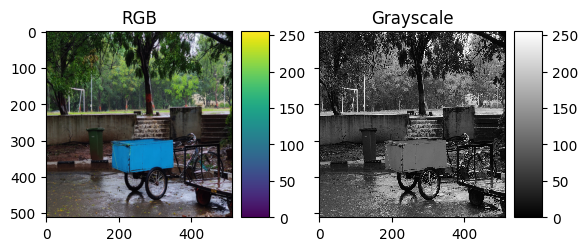

In [2]:
for path in paths:
    img = cv2.imread("Images/"+path, 1)
    img = cv2.resize(img, (512,512))
    images = [img, cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)]
    fig = plt.figure()
    grid = get_grid(1,2)
    
    print(path)
    print("Height: " + str(images[0].shape[0]) + "px")
    print("Width: " + str(images[0].shape[1]) + "px")
    print("Number of channels: " + str(images[0].shape[2]))
    
    im0 = grid[0].imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
    grid.cbar_axes[0].colorbar(im0)
    grid[0].set_title('RGB')
    
    im1 = grid[1].imshow(images[1], cmap='gray', interpolation='nearest')
    grid.cbar_axes[1].colorbar(im1)
    grid[1].set_title('Grayscale')
    
    plt.show()

### Image Signal Suraface plot

Lenna.png


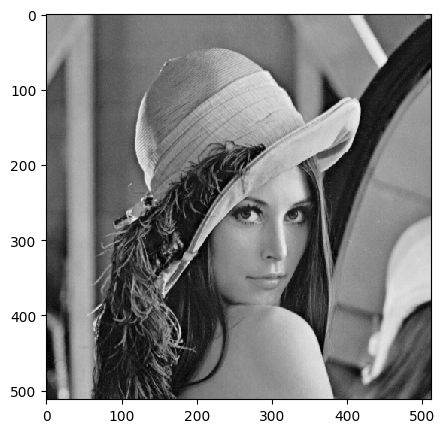

Image Signal Suraface plot


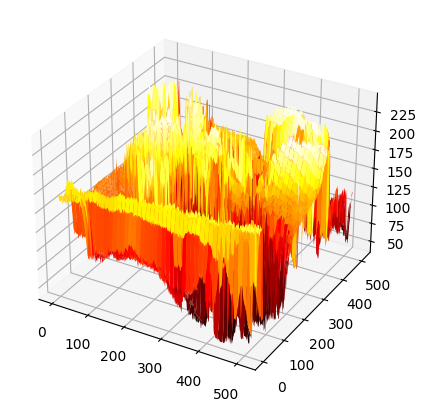

Buildings.jpg


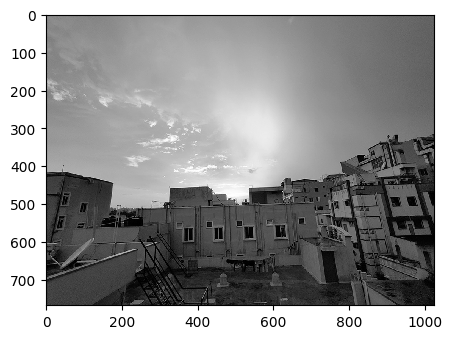

Image Signal Suraface plot


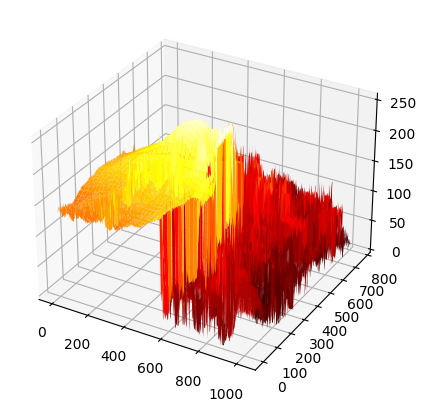

Cart.jpg


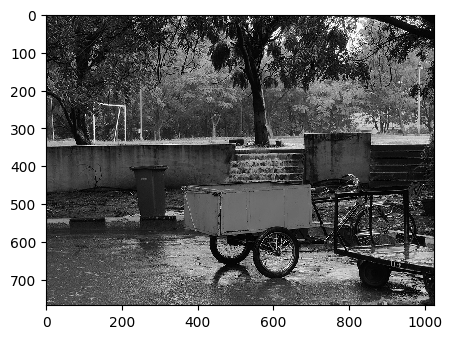

Image Signal Suraface plot


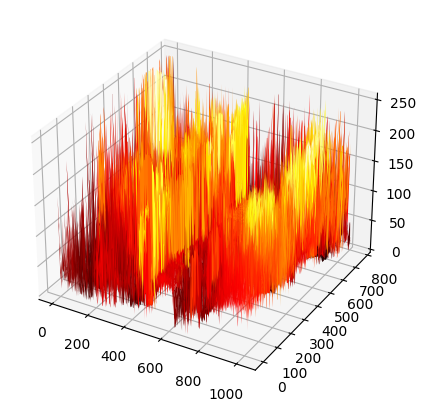

In [8]:
for path in paths:
    print(path)
    fig = plt.figure(figsize =(5, 5))
    img = cv2.imread("Images/"+path, cv2.IMREAD_GRAYSCALE)
    im = plt.imshow(img, interpolation ="none", cmap ="gray")
    plt.show()
    print("Image Signal Suraface plot")
    fig = plt.figure(figsize =(5, 5))
    dim = (img.shape[0],img.shape[1])
    img = cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC)
    xx, yy = np.mgrid[0:img.shape[0], 0:img.shape[1]]
    ax = plt.axes(projection='3d')
    ax.plot_surface(xx, yy, img, cmap=plt.get_cmap('hot'))
    plt.show()
    


### Gaussian Filter

Lenna.png


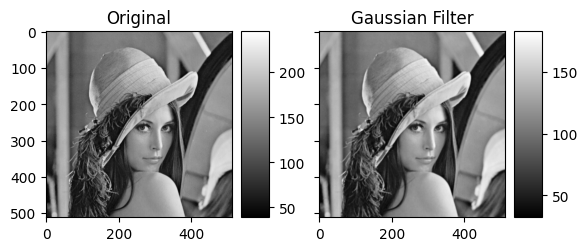

Buildings.jpg


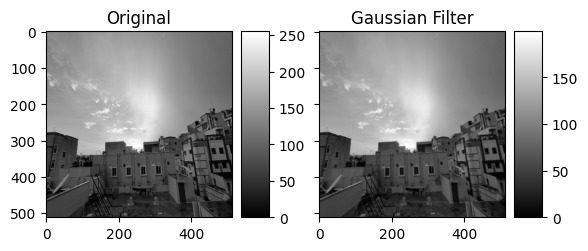

Cart.jpg


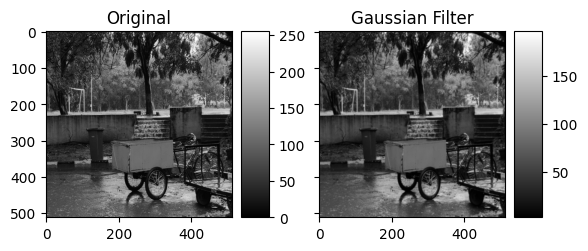

In [9]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

kernel = gaussian_kernel(3,1)


Lenna = cv2.imread("Images/"+paths[0], cv2.IMREAD_GRAYSCALE)
Lenna_gaussian = cv2.filter2D(Lenna,-1,kernel)

for path in paths:
    img = cv2.imread("Images/"+path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512,512))
    img2 = cv2.filter2D(img,-1,kernel)
    img1 = img 
    
    fig = plt.figure()
    grid = get_grid(1,2)
    
    titles = ['Original', 'Gaussian Filter']
    images = [img, img2]
    
    print(path)
    i = 0
    
    for img in images:
        im = grid[i].imshow(img, 'gray')
        grid.cbar_axes[i].colorbar(im)
        grid[i].set_title(titles[i])
        i+=1
    plt.show()


### Gaussian - PIL

In [ ]:
from PIL import Image, ImageFilter
  
# Opening the image 
# (R prefixed to string in order to deal with '\' in paths)
image = Image.open(r"Images/Lenna.png")

  
# Blurring image by sending the ImageFilter.
# GaussianBlur predefined kernel argument
image = image.filter(ImageFilter.GaussianBlur)
  
# Displaying the image
image.show()

### Sobel Operator

Lenna.png


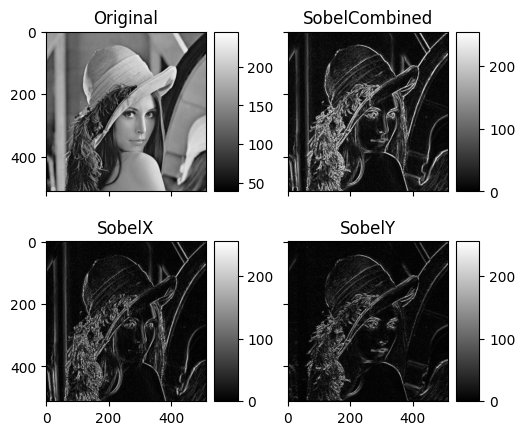

Buildings.jpg


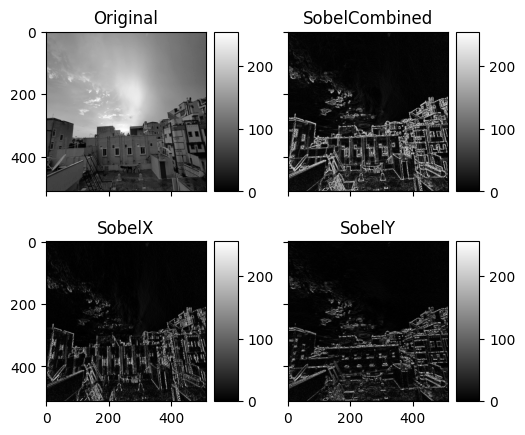

Cart.jpg


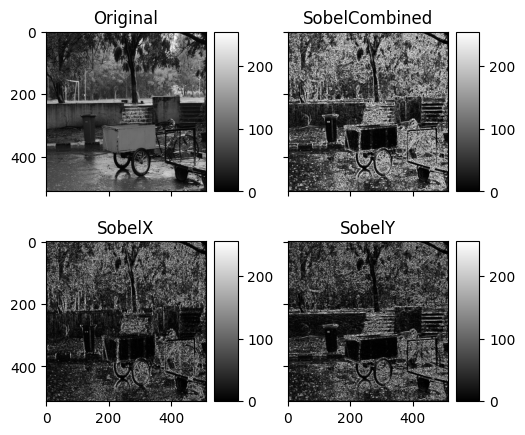

In [17]:
for path in paths:
    img = cv2.imread("Images/"+path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512,512))
    sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)
    sobelX = np.uint8(np.absolute(sobelX))
    sobelY = np.uint8(np.absolute(sobelY))
    sobelCombined = cv2.bitwise_or(sobelX, sobelY)
    
    fig = plt.figure()
    grid = get_grid(2,2)
    
    titles = ['Original', 'SobelCombined', 'SobelX', 'SobelY']
    images = [img, sobelCombined, sobelX, sobelY]
    
    print(path)
    i = 0
    
    for img in images:
        im = grid[i].imshow(img, 'gray')
        grid.cbar_axes[i].colorbar(im)
        grid[i].set_title(titles[i])
        i+=1
    plt.show()
    

### Laplacian Operator

Lenna.png


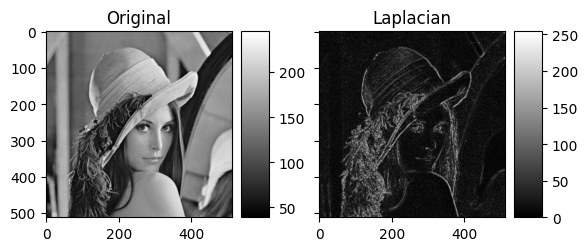

Buildings.jpg


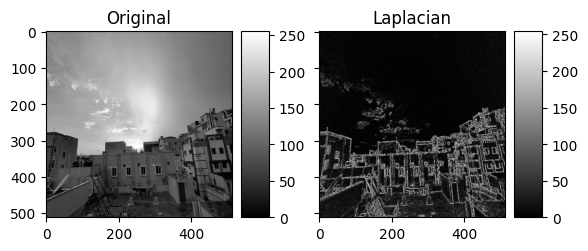

Cart.jpg


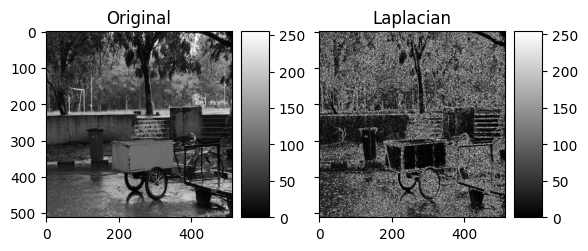

In [18]:
for path in paths:
    img = cv2.imread("Images/"+path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512,512))
    lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
    lap = np.uint8(np.absolute(lap))
    
    fig = plt.figure()
    grid = get_grid(1,2)
    
    titles = ['Original', 'Laplacian']
    images = [img, lap]
    
    print(path)
    i = 0
    
    for img in images:
        im = grid[i].imshow(img, 'gray')
        grid.cbar_axes[i].colorbar(im)
        grid[i].set_title(titles[i])
        i+=1
    plt.show()
    

### Canny Filter

Lenna.png


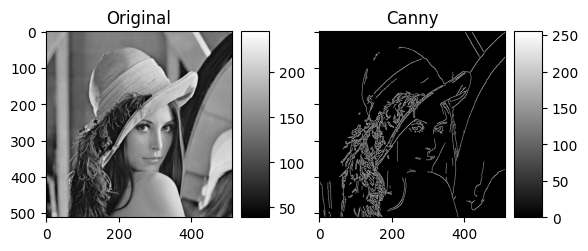

Buildings.jpg


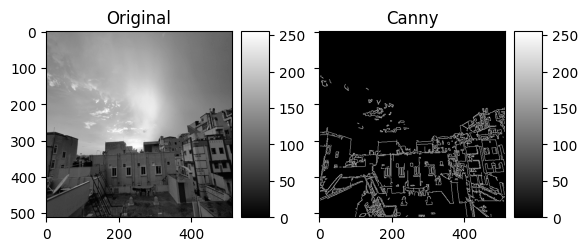

Cart.jpg


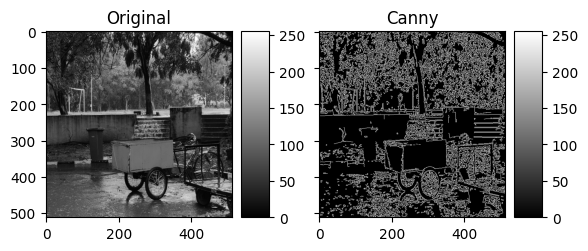

In [19]:
for path in paths:
    img = cv2.imread("Images/"+path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512,512))
    canny = cv2.Canny(img, 100, 200)
    
    fig = plt.figure()
    grid = get_grid(1,2)
    
    titles = ['Original', 'Canny']
    images = [img, canny]
    
    print(path)
    i = 0
    
    for img in images:
        im = grid[i].imshow(img, 'gray')
        grid.cbar_axes[i].colorbar(im)
        grid[i].set_title(titles[i])
        i+=1
    plt.show()
    

### Scale Problem

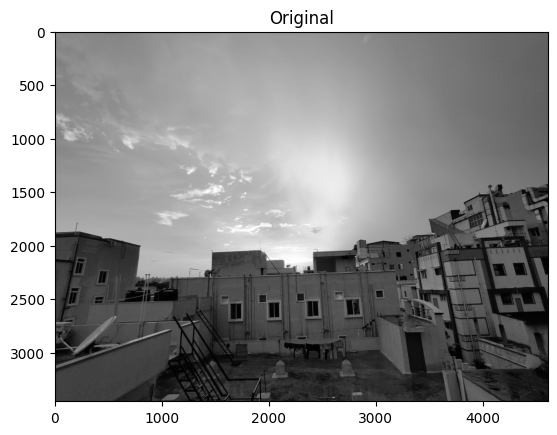

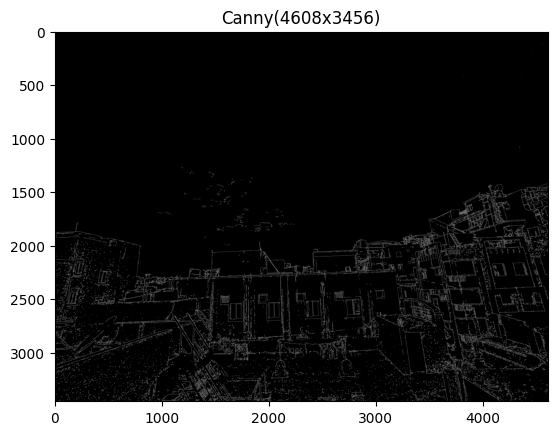

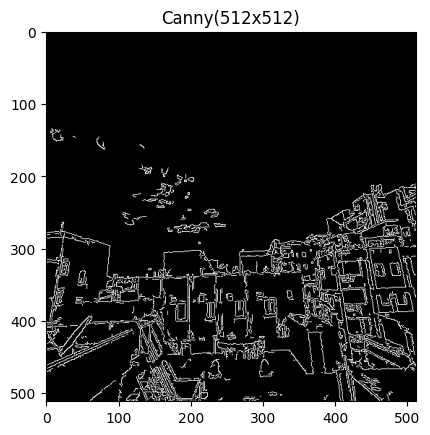

In [20]:
img = cv2.imread("Images/Scale.jpg", cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img, (512,512))
canny = cv2.Canny(img, 100, 200)
canny1 = cv2.Canny(img1, 100, 200)


titles = ['Original', 'Canny(4608x3456)', 'Canny(512x512)']
images = [img, canny, canny1]

i = 0

for img in images:
    plt.figure()
    plt.title(titles[i])
    plt.imshow(img, cmap='gray') 
    plt.show()
    i+=1





Lenna.png


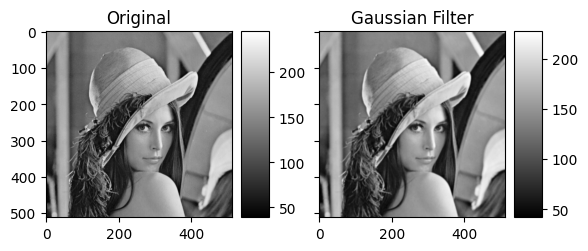

Buildings.jpg


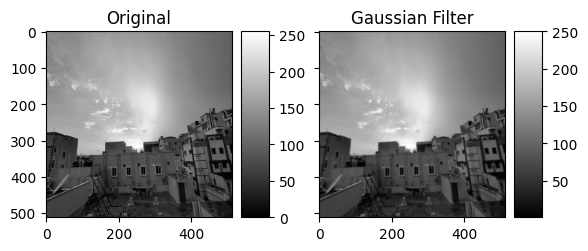

Cart.jpg


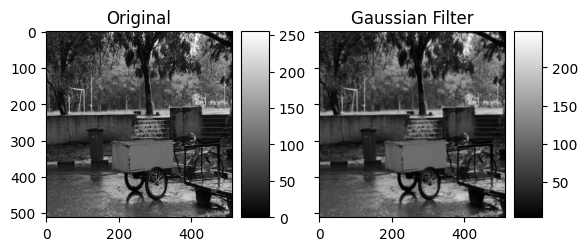

In [21]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

kernel = gaussian_kernel(5)

for path in paths:
    img = cv2.imread("Images/"+path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512,512))
    img2 = cv2.filter2D(img,-1,kernel)
    
    fig = plt.figure()
    grid = get_grid(1,2)
    
    titles = ['Original', 'Gaussian Filter']
    images = [img, img2]
    
    print(path)
    i = 0
    
    for img in images:
        im = grid[i].imshow(img, 'gray')
        grid.cbar_axes[i].colorbar(im)
        grid[i].set_title(titles[i])
        i+=1
    plt.show()


### Roberts Operator


Lenna.png


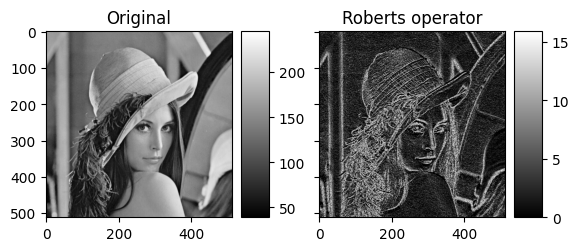

Buildings.jpg


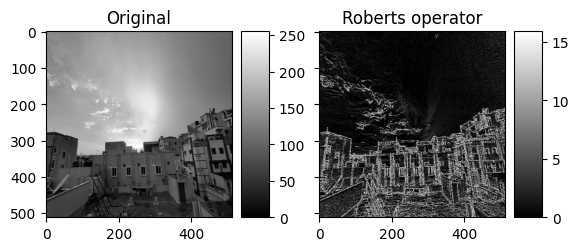

Cart.jpg


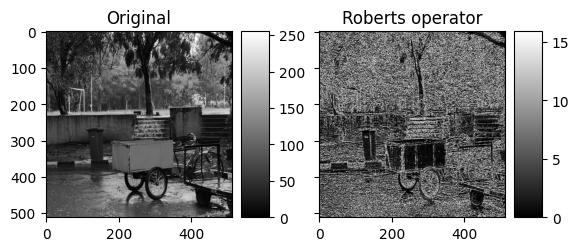

In [2]:
def roberts_operator(img):
    kernel1 = np.array([[1,0],[0,-1]])
    kernel2 = np.array([[0,1],[-1,0]])
    vertical = cv2.filter2D(img,-1,kernel1)
    horizontal = cv2.filter2D(img,-1,kernel2)
    edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
    return edged_img




for path in paths:
    img = cv2.imread("Images/"+path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512,512))
    img2= roberts_operator(img)
    fig = plt.figure()
    grid = get_grid(1,2)
    
    titles = ['Original', 'Roberts operator']
    images = [img, img2]
    
    print(path)
    i = 0
    
    for img in images:
        im = grid[i].imshow(img, 'gray')
        grid.cbar_axes[i].colorbar(im)
        grid[i].set_title(titles[i])
        i+=1
    plt.show()
    
    






### Prewitt Operator



Lenna.png


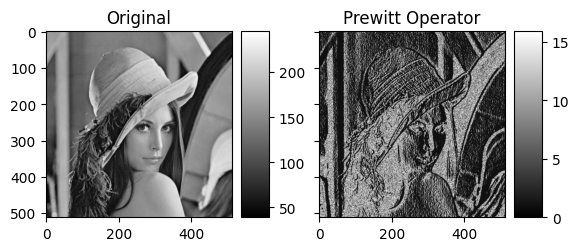

Buildings.jpg


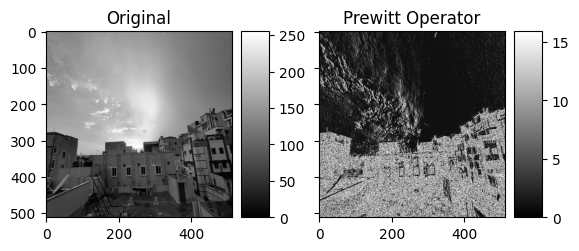

Cart.jpg


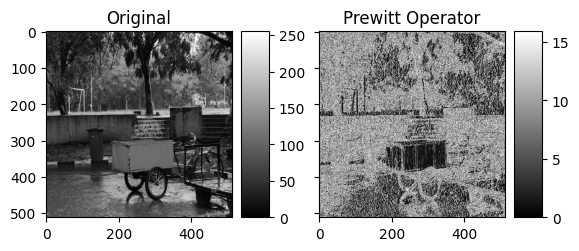

In [23]:
def prewitt_operator(img):
    kernel1 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    kernel2 = np.array([[1,1,1],[0,0,0],[0,0,0]])
    vertical = cv2.filter2D(img,-1,kernel1)
    horizontal = cv2.filter2D(img,-1,kernel2)
    edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
    return edged_img




for path in paths:
    img = cv2.imread("Images/"+path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512,512))
    img2= prewitt_operator(img)
    fig = plt.figure()
    grid = get_grid(1,2)
    
    titles = ['Original', 'Prewitt Operator']
    images = [img, img2]
    
    print(path)
    i = 0
    
    for img in images:
        im = grid[i].imshow(img, 'gray')
        grid.cbar_axes[i].colorbar(im)
        grid[i].set_title(titles[i])
        i+=1
    plt.show()

### Gradient Calculation


Lenna.png


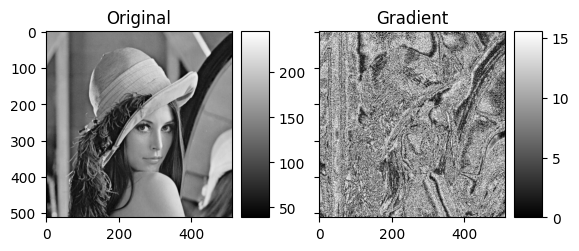

Buildings.jpg


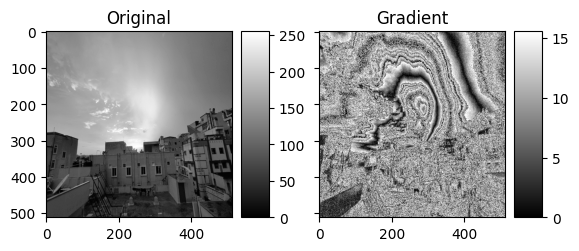

Cart.jpg


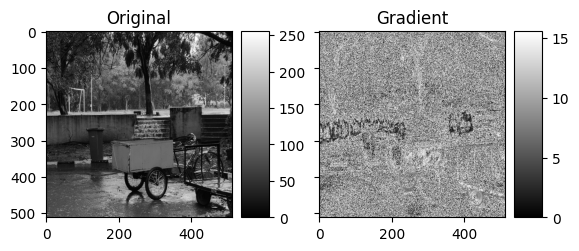

In [24]:
def gradient(img):
    kernel1 = np.array([[0,0,0],[0,1,0],[0,0,0]])
    kernel2 = np.array([[0,0,0],[0,1,0],[0,0,0]])
    vertical = cv2.filter2D(img,-1,kernel1)
    horizontal = cv2.filter2D(img,-1,kernel2)
    edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
    return edged_img




for path in paths:
    img = cv2.imread("Images/"+path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512,512))
    img2=gradient(img)
    fig = plt.figure()
    grid = get_grid(1,2)
    
    titles = ['Original', 'Gradient']
    images = [img, img2]
    
    print(path)
    i = 0
    
    for img in images:
        im = grid[i].imshow(img, 'gray')
        grid.cbar_axes[i].colorbar(im)
        grid[i].set_title(titles[i])
        i+=1
    plt.show()
 

### Non-Maximum Suppression


In [7]:
import math


def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z      
    

for path in paths:
    img = cv2.imread("Images/"+path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512,512))
    img= np.array(img)
    img2= non_max_suppression(img, 12)
    fig = plt.figure()
    grid = get_grid(1,2)
    
    titles = ['Original', 'non-maximumsuppression']
    images = [img, img2]
    
    print(path)
    i = 0
    
    for img in images:
        im = grid[i].imshow(img, 'gray')
        grid.cbar_axes[i].colorbar(im)
        grid[i].set_title(titles[i])
        i+=1
    plt.show()

    

TypeError: 'float' object is not subscriptable

### Double threshold


Lenna.png


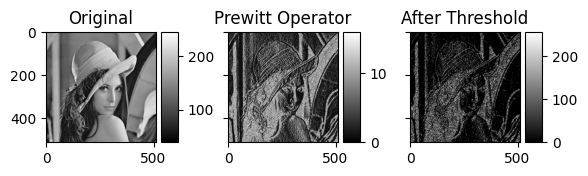

Buildings.jpg


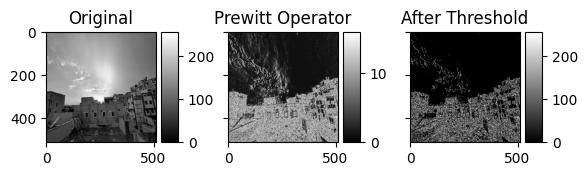

Cart.jpg


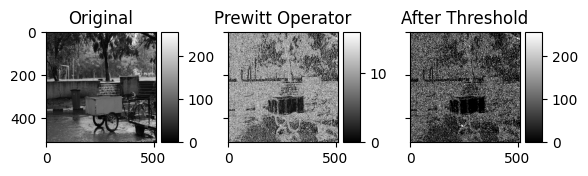

In [26]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

def prewitt_operator(img):
    kernel1 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    kernel2 = np.array([[1,1,1],[0,0,0],[0,0,0]])
    vertical = cv2.filter2D(img,-1,kernel1)
    horizontal = cv2.filter2D(img,-1,kernel2)
    edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
    return edged_img


for path in paths:
    img = cv2.imread("Images/"+path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512,512))
    img2= prewitt_operator(img)
    img3= threshold(img2, 0.59, 0.79)
    fig = plt.figure()
    grid = get_grid(1,3)
    
    titles = ['Original', 'Prewitt Operator', 'After Threshold']
    images = [img, img2, img3[0]]
    
    print(path)
    i = 0
    
    for img in images:
        im = grid[i].imshow(img, 'gray')
        grid.cbar_axes[i].colorbar(im)
        grid[i].set_title(titles[i])
        i+=1
    plt.show()

Lenna.png


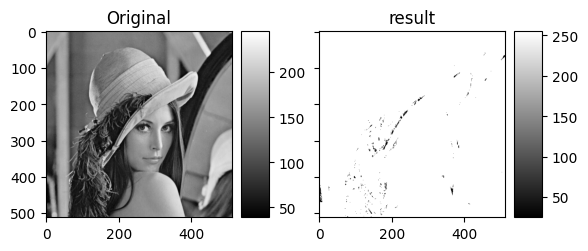

Buildings.jpg


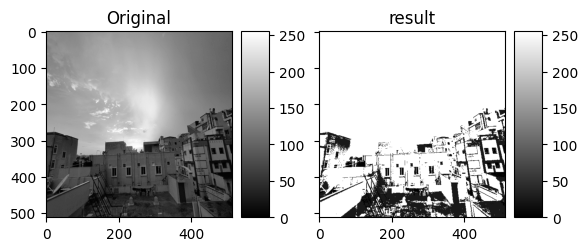

Cart.jpg


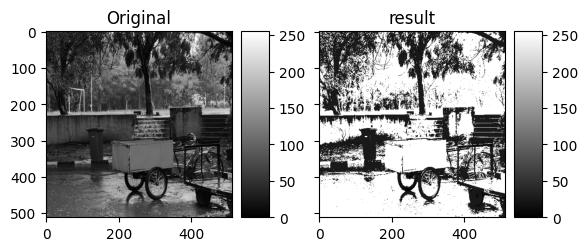

In [27]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)


for path in paths:
    
    img = cv2.imread("Images/"+path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512,512))
    img_t= threshold(img, 0.1, 0.2)
    fig = plt.figure()
    grid = get_grid(1,2)
    
    titles = ['Original', 'result']
    images = [img, img_t[0]]
    print(path)
  
    i = 0
    
    for img in images:
        im = grid[i].imshow(img, 'gray')
        grid.cbar_axes[i].colorbar(im)
        grid[i].set_title(titles[i])
        i+=1
    plt.show()

    
   




### Edge Tracking by Hysteresis


Lenna.png


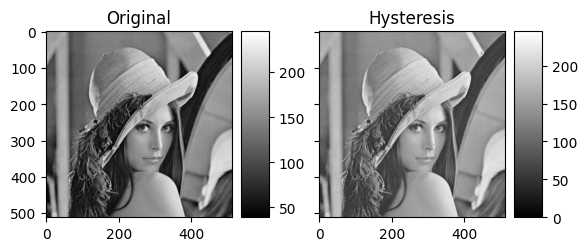

Buildings.jpg


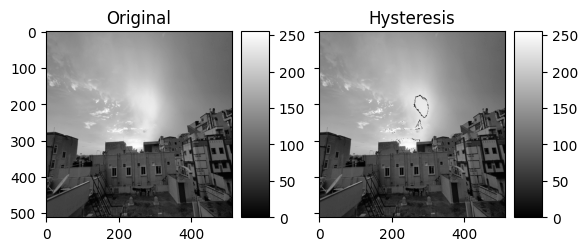

Cart.jpg


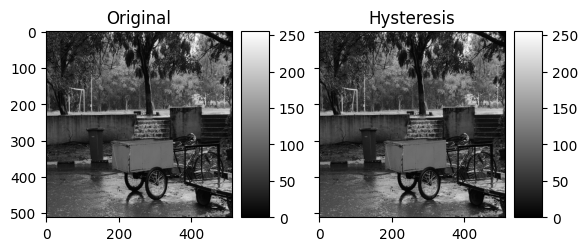

In [28]:

def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

for path in paths:
    img = cv2.imread("Images/"+path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512,512))
    titles = ['Original', 'Hysteresis']
    fig = plt.figure()
    grid = get_grid(1,2)
    print(path)
    im = grid[0].imshow(img, 'gray')
    grid.cbar_axes[0].colorbar(im)
    grid[0].set_title(titles[0])
   
    img_h = hysteresis(img, 230, 255)
    im1 = grid[1].imshow(img_h, 'gray')
    grid.cbar_axes[1].colorbar(im1)
    grid[1].set_title(titles[1])
    plt.show()


### Canny Steps

In [4]:
from scipy import ndimage
import cv2
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
import mpl_toolkits.axes_grid1 as axes_grid1
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: 84em; }</style>"))

def gaussian_kernel(size, sigma=1.4):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

def gradient(img):
    kernel1 = np.array([[0,0,0],[0,1,0],[0,0,0]])
    kernel2 = np.array([[0,0,0],[0,1,0],[0,0,0]])
    vertical = cv2.filter2D(img,-1,kernel1)
    horizontal = cv2.filter2D(img,-1,kernel2)
    edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
    return edged_img


def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.convolve(img, Kx)
    Iy = ndimage.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)

    return (G, theta)
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z      

def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

def gradient(img):
    kernel1 = np.array([[0,0,0],[0,1,0],[0,0,0]])
    kernel2 = np.array([[0,0,0],[0,1,0],[0,0,0]])
    vertical = cv2.filter2D(img,-1,kernel1)
    horizontal = cv2.filter2D(img,-1,kernel2)
    edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
    return edged_img

    
kernel = gaussian_kernel(5)



Image = cv2.imread("Images/Scale.jpg", cv2.IMREAD_GRAYSCALE)
#Step 1
Image_gaussian = cv2.filter2D(Image,-1,kernel)
#Step 2
Image_Sobel = sobel_filters(Image_gaussian)
Image_Sobel_magnitude = Image_Sobel[0]
Image_Sobel_angle = Image_Sobel[1]
#Step 2.5
Image_gradient = gradient(Lenna_gaussian)
#Step 3
Image_nonMaxSupression = non_max_suppression(Image_gaussian, Image_gradient)
#Step 4
Image_threshold = threshold(Image_gradient, 0.01, 0.6)
#Step 5
Image_hysteresis = hysteresis(Lenna_nonMaxSupression, 0, 255)

images = [Image, 
          Image_gaussian, 
          Image_Sobel_magnitude,  
          Image_Sobel_angle, 
          Image_threshold[0], 
          Image_nonMaxSupression, 
          Image_hysteresis]
titles = ["Image", 
          "Image_gaussian", 
          "Image_Sobel_magnitude",  
          "Image_Sobel_angle", 
          "Image_threshold", 
          "Image_nonMaxSupression", 
          "Image_hysteresis"]

fig = plt.figure()
i = 0
for img in images:
    plt.title(titles[i])
    plt.imshow(img, cmap="gray")
    plt.show()
    i+=1


NameError: name 'Lenna_gaussian' is not defined